<a href="https://colab.research.google.com/github/sumantis/Machine_Learning/blob/master/Copy_of_supervisedML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression
---

## What is Regression?

Regression is a fundamental technique in machine learning and statistics used to model the relationship between one or more independent variables (features) and a dependent variable (target). The primary goal of regression is to predict continuous numerical values based on input features.

In essence, regression helps us answer questions like:
- How much will a house cost based on its size and location?
- What will be the sales of a product given its advertising budget?
- How does a person's age affect their income?

## Types of Regression

While we'll focus primarily on linear regression in this notebook, it's worth mentioning that there are several types of regression:

1. **Linear Regression**: Models a linear relationship between features and target.
2. **Polynomial Regression**: Extends linear regression to capture non-linear relationships.
3. **Logistic Regression**: Despite its name, it's used for binary classification problems.
4. **Ridge Regression**: Linear regression with L2 regularization.
5. **Lasso Regression**: Linear regression with L1 regularization.
6. **Elastic Net Regression**: Combines both L1 and L2 regularization.

## Real-world Applications

Regression analysis finds applications in various fields:
- **Finance**: Predicting stock prices, risk assessment, portfolio management.
- **Economics**: Forecasting economic trends, analyzing supply and demand.
- **Healthcare**: Predicting patient outcomes, drug efficacy studies.
- **Marketing**: Sales forecasting, customer lifetime value prediction.
- **Environmental Science**: Climate modeling, pollution level prediction.
- **Sports Analytics**: Player performance prediction, game outcome forecasting.

## Linear Regression: The Foundation

In this notebook, we'll dive deep into linear regression, which serves as the foundation for many advanced regression techniques. Linear regression assumes a linear relationship between the input features and the target variable.

The basic form of a linear regression model is:

y = β₀ + β₁x₁ + β₂x₂ + ... + βₙxₙ + ε

Where:
- y is the target variable
- x₁, x₂, ..., xₙ are the input features
- β₀ is the intercept (bias term)
- β₁, β₂, ..., βₙ are the coefficients (weights)
- ε is the error term


Our goal will be to find the best values for β₀, β₁, β₂, ..., βₙ that minimize the difference between our predictions and the actual values.

In the following sections, we'll explore how to implement linear regression using popular libraries like scikit-learn, and evaluate our models effectively.

# Complete Guide to Linear Regression
## Experience vs Salary Analysis with Python Libraries

## Table of Contents
1. [Libraries Overview](#libraries-overview)
2. [Dataset Description](#dataset-description)
3. [Data Preprocessing](#data-preprocessing)
4. [Scikit-learn Functions](#scikit-learn-functions)
5. [Common Functions Explained](#common-functions-explained)
6. [Data Visualization](#data-visualization)
7. [Evaluation Metrics](#evaluation-metrics)
8. [Hyperparameters](#hyperparameters)
9. [Pros and Cons](#pros-and-cons)
10. [Best Practices](#best-practices)

## Libraries Overview

### 1. Scikit-learn
- **Purpose**: Machine learning library for Python
- **Key Features**:
  - Consistent API across different models
  - Built-in dataset handling
  - Model selection and evaluation tools
  - Data preprocessing utilities
- **Installation**: `pip install scikit-learn`

### 2. Matplotlib
- **Purpose**: Plotting library for Python
- **Key Features**:
  - Object-oriented interface
  - Publication-quality figures
  - Multiple output formats
  - Extensive customization options
- **Usage**: Basic to advanced data visualization

### 3. NumPy
- **Purpose**: Numerical computing library
- **Key Features**:
  - Multi-dimensional array support
  - Mathematical operations
  - Broadcasting capabilities
  - Random number generation
- **Core for**: Data manipulation and computation

### 4. Pandas
- **Purpose**: Data manipulation library
- **Key Features**:
  - DataFrame structure
  - Data cleaning tools
  - File I/O operations
  - Data analysis functions
- **Usage**: Data preprocessing and analysis

## Dataset Description

### Structure
```python
data = pd.DataFrame({
    'experience': experience,  # Years of professional experience
    'salary': salary          # Annual salary in USD
})
```

### Characteristics
- **Size**: 100 samples
- **Features**:
  - Experience (Independent variable)
    - Range: 1-15 years
    - Type: Continuous
  - Salary (Dependent variable)
    - Base: $30,000
    - Increment: ~$5,000 per year
    - Noise: Normal distribution (μ=0, σ=10,000)

### Data Generation Process
```python
# Linear relationship with noise
salary = base_salary + (increment * experience) + random_noise
```

## Data Preprocessing

### Formula:

For scaling to [0, 1]:

$$X_{norm} = \frac{X - X_{min}}{X_{max} - X_{min}}$$

For scaling to [-1, 1]:

$$X_{norm} = 2 * \frac{X - X_{min}}{X_{max} - X_{min}} - 1$$

Where:
- $X$ is the original value
- $X_{min}$ is the minimum value of the feature
- $X_{max}$ is the maximum value of the feature
- $X_{norm}$ is the normalized value

### Pros:
- Bounds values to a specific range
- Preserves zero entries in sparse data

### Cons:
- Doesn't handle outliers well

#### Implementation
```python
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)
```

#### Advantages
- Fixed bounds for all features
- Preserves zero values
- Maintains sparsity
- Handles small standard deviations

#### Disadvantages
- Sensitive to outliers
- Limited handling of new data outside range

### 2. Standardization (Z-score Normalization)
- **Purpose**: Transform data to have mean=0, std=1
- **Formula**:
```
X_std = (X - μ) / σ
```

#### Implementation
```python
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)
```

## Data Visualization

### 1. Scatter Plot Analysis
```python
plt.figure(figsize=(10, 6))
plt.scatter(data['experience'], data['salary'], alpha=0.5)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Experience vs Salary')
plt.grid(True)
plt.show()
```

#### Components
1. Data Points
   - X-axis: Experience (years)
   - Y-axis: Salary (USD)
   - Alpha: Point transparency

2. Visual Elements
   - Title: Clear description
   - Labels: Meaningful axes labels
   - Grid: Reference lines
   - Legend: Data point explanation

3. Interpretation
   - Trend identification
   - Outlier detection
   - Pattern recognition
   - Relationship assessment

## Scikit-learn Functions

### LinearRegression Class
```python
from sklearn.linear_model import LinearRegression
```
- **Purpose**: Implements Ordinary Least Squares (OLS)
- **Key Methods**:
  - `fit(X, y)`: Train the model
  - `predict(X)`: Make predictions
  - `score(X, y)`: Calculate R² score

### train_test_split Function
```python
from sklearn.model_selection import train_test_split
```
- **Purpose**: Split data into training and testing sets
- **Parameters**:
  - `test_size`: Proportion of test data
  - `random_state`: Seed for reproducibility
  - `shuffle`: Whether to shuffle data

### Metrics Functions
```python
from sklearn.metrics import mean_squared_error, r2_score
```
- **Purpose**: Model evaluation
- **Functions**:
  - `mean_squared_error()`: MSE calculation
  - `r2_score()`: R² calculation

## Common Functions Explained

### fit()
```python
model.fit(X_train, y_train)
```
- **Purpose**: Train the model
- **Process**:
  1. Calculate optimal coefficients
  2. Minimize squared residuals
  3. Store model parameters
- **Parameters**:
  - `X`: Feature matrix
  - `y`: Target variable

### transform()
```python
scaler.transform(X)
```
- **Purpose**: Apply preprocessing
- **Usage**: Feature scaling
- **Note**: Use fitted parameters

### predict()
```python
model.predict(X)
```
- **Purpose**: Generate predictions
- **Process**: Apply learned coefficients
- **Returns**: Predicted values

### axis Parameter
```python
data.mean(axis=0)  # Column means
data.mean(axis=1)  # Row means
```
- **axis=0**: Column operations
- **axis=1**: Row operations

## Evaluation Metrics

### 1. R-squared (R²)
- **Formula**: R² = 1 - (SSres / SStot)
  - SSres = Σ(yi - ŷi)²
  - SStot = Σ(yi - ȳ)²
- **Range**: 0 to 1
- **Interpretation**:
  - 1.0: Perfect fit
  - 0.0: Baseline model
- **Importance**:
  - Variance explanation
  - Model comparison
- **Limitations**:
  - Outlier sensitivity
  - Feature bias

### 2. Mean Squared Error (MSE)
- **Formula**: MSE = (1/n) * Σ(yi - ŷi)²
- **Range**: 0 to ∞
- **Interpretation**:
  - Lower is better
  - Squared units
- **Importance**:
  - Error magnitude
  - Optimization metric
- **Limitations**:
  - Scale dependence
  - Squared units

## Hyperparameters

### LinearRegression Parameters
1. **fit_intercept** (default=True)
   - Intercept calculation
   - Model flexibility
   - Centered data handling

2. **normalize** (deprecated)
   - Feature standardization
   - Use StandardScaler instead
   - Scaling importance

3. **copy_X** (default=True)
   - Data copying
   - Memory management
   - Original data preservation

4. **n_jobs** (default=None)
   - Parallel processing
   - Computation optimization
   - Resource utilization

### train_test_split Parameters
1. **test_size**
   - Test set proportion
   - Validation strategy
   - Model evaluation

2. **random_state**
   - Result reproducibility
   - Random seed
   - Consistent splits

3. **shuffle**
   - Data randomization
   - Bias prevention
   - Sample independence

## Pros and Cons

### Advantages
1. **Simplicity**
   - Easy understanding
   - Quick implementation
   - Fast computation

2. **Interpretability**
   - Clear coefficients
   - Feature importance
   - Direct relationships

3. **Statistical Properties**
   - Well-understood
   - Established theory
   - Clear assumptions

4. **Baseline Model**
   - Quick start
   - Performance benchmark
   - Model comparison

### Disadvantages
1. **Linearity Assumption**
   - Limited flexibility
   - Complex patterns
   - Real-world applicability

2. **Outlier Sensitivity**
   - Coefficient skew
   - Result distortion
   - Data cleaning needs

3. **Feature Independence**
   - Correlation issues
   - Multicollinearity
   - Feature selection

4. **Data Requirements**
   - Sample size needs
   - Distribution assumptions
   - Missing data handling

## Best Practices

### 1. Data Preparation
- Clean outliers
- Handle missing values
- Scale features
- Check distributions

### 2. Model Building
- Start simple
- Use cross-validation
- Check assumptions
- Monitor metrics

### 3. Evaluation
- Multiple metrics
- Residual analysis
- Prediction validation
- Baseline comparison


Model Parameters:
Coefficient (slope): 0.9882
Intercept: 0.0000

Model Performance:
Mean squared error: 0.0235
R-squared score: 0.9765


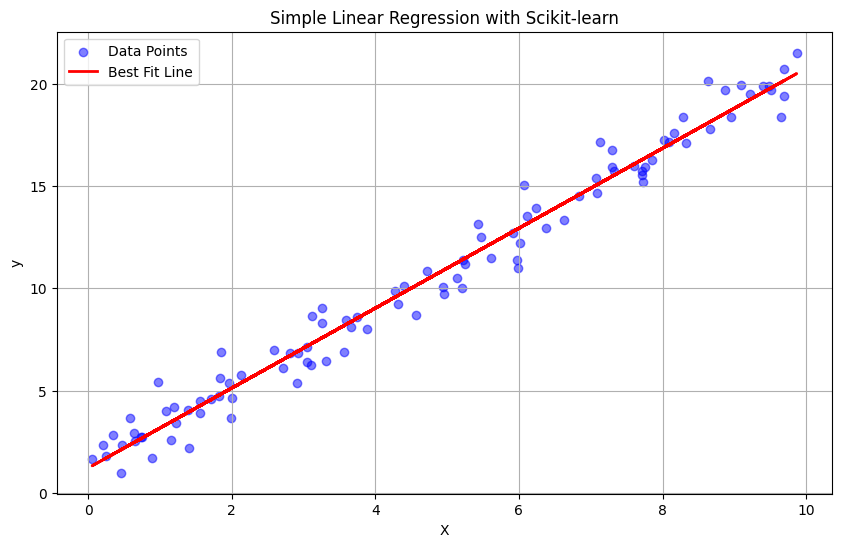

In [ ]:
"""
Simple Linear Regression Implementation using Scikit-learn
with Data Scaling Techniques and Visualization

This script demonstrates:
1. Data generation with controlled randomness
2. Data scaling using StandardScaler and MinMaxScaler
3. Linear regression model training and prediction
4. Model evaluation with metrics
5. Simple visualization with best fit line

Author: Your Name
Date: Current Date
"""

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score

def generate_sample_data(n_samples=100, random_seed=42):
   """
   Generate synthetic data for linear regression.

   Parameters:
   -----------
   n_samples : int, optional (default=100)
       Number of samples to generate
   random_seed : int, optional (default=42)
       Random seed for reproducibility

   Returns:
   --------
   X : ndarray of shape (n_samples, 1)
       Input features
   y : ndarray of shape (n_samples, 1)
       Target values with added noise
   """
   np.random.seed(random_seed)
   X = np.random.rand(n_samples, 1) * 10  # Features between 0 and 10
   y = 2 * X + 1 + np.random.randn(n_samples, 1)  # Linear relationship with noise
   return X, y

def scale_data(X, y):
   """
   Scale features and target using both standardization and normalization.

   Parameters:
   -----------
   X : array-like of shape (n_samples, 1)
       Features to scale
   y : array-like of shape (n_samples, 1)
       Target values to scale

   Returns:
   --------
   dict containing scaled versions of the data and the scaler objects
   """
   # Standardization (mean=0, variance=1)
   scaler_standard = StandardScaler()
   X_standardized = scaler_standard.fit_transform(X)
   y_standardized = scaler_standard.fit_transform(y)

   # Normalization (values between 0 and 1)
   scaler_minmax = MinMaxScaler()
   X_normalized = scaler_minmax.fit_transform(X)
   y_normalized = scaler_minmax.fit_transform(y)

   return {
       'X_standardized': X_standardized,
       'y_standardized': y_standardized,
       'X_normalized': X_normalized,
       'y_normalized': y_normalized,
       'scaler_standard': scaler_standard
   }

def train_and_evaluate_model(X, y):
   """
   Train linear regression model and calculate performance metrics.

   Parameters:
   -----------
   X : array-like of shape (n_samples, 1)
       Training features
   y : array-like of shape (n_samples, 1)
       Target values

   Returns:
   --------
   dict containing model, predictions, and metrics
   """
   # Create and train the model
   model = LinearRegression()
   model.fit(X, y)

   # Make predictions
   y_pred = model.predict(X)

   # Calculate metrics
   mse = mean_squared_error(y, y_pred)
   r2 = r2_score(y, y_pred)

   return {
       'model': model,
       'predictions': y_pred,
       'mse': mse,
       'r2': r2
   }

# Generate data
X, y = generate_sample_data()

# Scale data
scaled_data = scale_data(X, y)

# Train model using standardized data
model_results = train_and_evaluate_model(
   scaled_data['X_standardized'],
   scaled_data['y_standardized']
)

# Transform predictions back to original scale
y_pred = scaled_data['scaler_standard'].inverse_transform(
   model_results['predictions'].reshape(-1, 1)
)

# Print model parameters and metrics
print("Model Parameters:")
print(f"Coefficient (slope): {model_results['model'].coef_[0][0]:.4f}")
print(f"Intercept: {model_results['model'].intercept_[0]:.4f}")
print("\nModel Performance:")
print(f"Mean squared error: {model_results['mse']:.4f}")
print(f"R-squared score: {model_results['r2']:.4f}")

# Create visualization
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', alpha=0.5, label='Data Points')
plt.plot(X, y_pred, color='red', linewidth=2, label='Best Fit Line')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Simple Linear Regression with Scikit-learn')
plt.legend()
plt.grid(True)
plt.show()

# Introduction to Classification

## What is Classification?

Classification is a supervised learning technique in machine learning where the goal is to predict the categorical class labels of new instances, based on past observations. Given an input variable (X), the algorithm tries to predict the output class (Y) from a set of predefined categories.

## Types of Classification

### 1. Binary Classification

Binary classification involves categorizing instances into one of two classes. It's the simplest form of classification.

Examples:
- Spam detection (Spam / Not Spam)
- Medical diagnosis (Disease present / Disease absent)
- Customer churn prediction (Will churn / Will not churn)

### 2. Multi-class Classification

Multi-class classification involves categorizing instances into one of three or more classes. Each instance belongs to exactly one class.

Examples:
- Handwritten digit recognition (0-9)
- Plant species classification
- Sentiment analysis (Positive / Neutral / Negative)

### 3. Multi-label Classification

In multi-label classification, each instance can belong to multiple classes simultaneously.

Examples:
- Image tagging (An image can have multiple tags like "beach", "sunset", "people")
- Document categorization (A document can belong to multiple categories)

## Classification Algorithms

This notebook will cover the following classification algorithms:

1. Logistic Regression
2. Support Vector Machines (SVM)
3. Decision Trees
4. Random Forest
5. Gradient Boosting Machines
6. K-Nearest Neighbors (KNN)
7. Naive Bayes

We'll also explore ensemble methods like Voting Classifiers and Stacking.

For each algorithm, we'll focus on:
- Implementation
- Hyperparameter tuning
- Interpretation of results
- Strengths and weaknesses

Let's dive into each algorithm and see how they can be applied to solve classification problems!

# Logistic Regression

Logistic Regression is a fundamental classification algorithm, particularly useful for binary classification problems. Despite its name, it's used for classification, not regression.

## Basic Concept

Logistic Regression models the probability that an instance belongs to a particular class. The model calculates the log-odds of the probability and uses the logistic function to transform it into a probability between 0 and 1.

## Implementation

Here's a basic implementation using scikit-learn:

```python
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Assume X and y are your features and target variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
```
#### Hyperparameter Tuning
Key hyperparameters for Logistic Regression include:

C: Inverse of regularization strength
penalty: Type of regularization ('l1', 'l2', 'elasticnet', 'none')
solver: Algorithm for optimization problem

Here's an example of hyperparameter tuning using GridSearchCV:

```python
from sklearn.model_selection import GridSearchCV

param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", grid_search.best_score_)
```

### Interpreting Coefficients
Logistic Regression coefficients represent the change in the log-odds of the outcome for a one-unit increase in the predictor variable.

```python
# Assuming binary classification
feature_names = X.columns  # If X is a DataFrame
coefficients = model.coef_[0]

for name, coef in zip(feature_names, coefficients):
    print(f"{name}: {coef}")
```

Positive coefficients increase the probability of the positive class, while negative coefficients decrease it. The magnitude of the coefficient indicates its importance.
Pros and Cons
#### Pros:

Simple and interpretable
Works well for linearly separable classes
Provides probability scores

#### Cons:

- Assumes linear relationship between features and log-odds
- May underperform with non-linear relationships
- Can struggle with imbalanced datasets

Logistic Regression is often a good starting point for binary classification problems due to its simplicity and interpretability

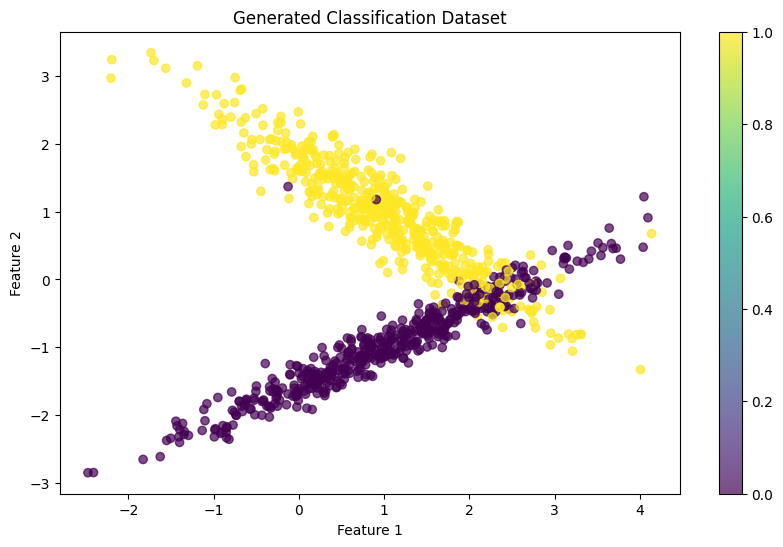

Accuracy: 0.9

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.91       104
           1       0.92      0.86      0.89        96

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200



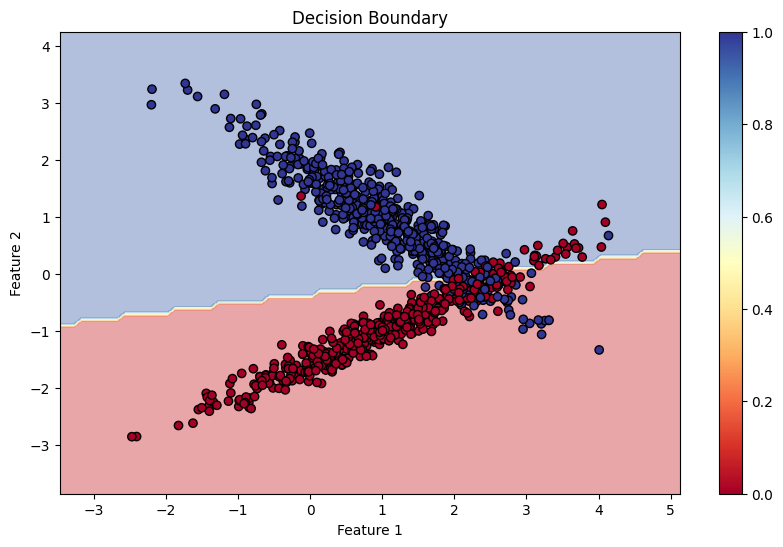

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

def generate_custom_dataset(n_samples=1000, n_features=2, n_classes=2):
    """
    Generate a custom dataset for classification using sklearn's make_classification.

    Parameters:
    -----------
    n_samples : int, optional (default=1000)
        The number of samples to generate.
    n_features : int, optional (default=2)
        The number of features to generate. Keep at 2 for easy visualization.
    n_classes : int, optional (default=2)
        The number of classes (or labels) to generate.

    Returns:
    --------
    X : array of shape (n_samples, n_features)
        The generated samples.
    y : array of shape (n_samples,)
        The integer labels for class membership of each sample.
    """
    X, y = make_classification(
        n_samples=n_samples,
        n_features=n_features,
        n_informative=2,
        n_redundant=0,
        n_classes=n_classes,
        n_clusters_per_class=1,
        random_state=42
    )
    return X, y

def visualize_dataset(X, y):
    """
    Visualize the generated dataset.

    Parameters:
    -----------
    X : array of shape (n_samples, n_features)
        The input samples.
    y : array of shape (n_samples,)
        The target values.
    """
    plt.figure(figsize=(10, 6))

    # Create a scatter plot
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', alpha=0.7)

    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('Generated Classification Dataset')

    # Add a color bar
    plt.colorbar(scatter)

    plt.show()

def create_logistic_regression_pipeline():
    """
    Create a pipeline for logistic regression with standardization.

    This pipeline ensures that the data is standardized before
    being fed into the logistic regression model.

    Returns:
    --------
    sklearn.pipeline.Pipeline
        A scikit-learn pipeline with StandardScaler and LogisticRegression.
    """
    return Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', LogisticRegression())
    ])

def evaluate_model(model, X_test, y_test):
    """
    Evaluate the model and print classification metrics.

    Parameters:
    -----------
    model : estimator object
        The fitted model to evaluate.
    X_test : array-like of shape (n_samples, n_features)
        The testing input samples.
    y_test : array-like of shape (n_samples,)
        The target values for testing.
    """
    # Use the model to make predictions on the test data
    y_pred = model.predict(X_test)

    # Calculate and print the accuracy score
    print("Accuracy:", accuracy_score(y_test, y_pred))

    # Print a detailed classification report
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

def plot_decision_boundary(X, y, model, ax=None):
    """
    Plot the decision boundary for a trained model.

    Parameters:
    -----------
    X : array-like of shape (n_samples, 2)
        The input samples (must be 2D for visualization).
    y : array-like of shape (n_samples,)
        The target values.
    model : fitted estimator object
        The trained model with a predict method.
    ax : matplotlib.axes.Axes, optional
        The axes on which to plot. If None, a new figure and axes will be created.

    Returns:
    --------
    matplotlib.axes.Axes
        The axes containing the plot.
    """
    # Create axes if not provided
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6))

    # Create a mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Make predictions on the mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    ax.contourf(xx, yy, Z, alpha=0.4, cmap='RdYlBu')

    # Plot the original data points
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu', edgecolor='black')

    # Set labels and title
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_title('Decision Boundary')

    # Add a colorbar
    plt.colorbar(scatter, ax=ax)

    return ax

if __name__ == "__main__":
    # Generate custom dataset
    X, y = generate_custom_dataset()

    # Visualize the dataset
    visualize_dataset(X, y)

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create the logistic regression pipeline
    pipeline = create_logistic_regression_pipeline()

    # Train the model
    pipeline.fit(X_train, y_train)

    # Evaluate the model
    evaluate_model(pipeline, X_test, y_test)

    # Visualize the decision boundary
    plot_decision_boundary(X, y, pipeline)
    plt.show()


# Support Vector Machines (SVM)
---

Support Vector Machines (SVM) are powerful and versatile machine learning models used for both classification and regression tasks. They are particularly effective in high-dimensional spaces and are memory-efficient due to their use of a subset of training points in the decision function (called support vectors).

## Core Concept

The main idea behind SVM is to find a hyperplane that best divides a dataset into classes. For binary classification:

1. SVM tries to find the hyperplane that maximizes the margin between the two classes.
2. The margin is defined as the distance between the hyperplane and the nearest data point from either class.
3. The data points nearest to the hyperplane are called support vectors.

## Mathematical Formulation

For a binary classification problem with training data {(x₁, y₁), ..., (xₙ, yₙ)}, where xᵢ ∈ ℝᵈ and yᵢ ∈ {-1, 1}, the SVM optimization problem can be formulated as:

$$
\begin{aligned}
\text{minimize}  & \quad \frac{1}{2}||w||^2 + C \sum_i \xi_i \\
\text{subject to} & \quad y_i(w \cdot x_i + b) \geq 1 - \xi_i  \quad \text{and} \quad \xi_i \geq 0 \quad \text{for all } i
\end{aligned}
$$

Where:
- w is the normal vector to the hyperplane
- b is the bias term
- ξᵢ are slack variables that allow for misclassification
- C is the regularization parameter

## Key Hyperparameters in Scikit-learn

1. **C** (float, default=1.0):
   - Regularization parameter. The strength of the regularization is inversely proportional to C.
   - Smaller values specify stronger regularization.

2. **kernel** (string, default='rbf'):
   - Specifies the kernel type to be used in the algorithm.
   - Options: 'linear', 'poly', 'rbf', 'sigmoid', 'precomputed'
   - 'rbf' (Radial Basis Function) is generally a good default.

3. **degree** (int, default=3):
   - Degree of the polynomial kernel function.
   - Ignored by all other kernels.

4. **gamma** (float, default='scale'):
   - Kernel coefficient for 'rbf', 'poly' and 'sigmoid'.
   - If gamma='scale' (default), it uses 1 / (n_features * X.var()) as value of gamma.
   - If gamma='auto', it uses 1 / n_features.

5. **class_weight** (dict or 'balanced', default=None):
   - Set the parameter C of class i to class_weight[i]*C for SVC.
   - If 'balanced', class weights are automatically adjusted inversely proportional to class frequencies.

## Pros and Cons

### Pros:
1. Effective in high-dimensional spaces.
2. Still effective when the number of dimensions is greater than the number of samples.
3. Memory efficient, as it uses a subset of training points (support vectors) in the decision function.
4. Versatile: different Kernel functions can be specified for the decision function.

### Cons:
1. If the number of features is much greater than the number of samples, avoiding over-fitting requires careful choice of kernel functions and regularization term.
2. SVMs do not directly provide probability estimates; these are calculated using an expensive five-fold cross-validation.
3. Can be sensitive to feature scaling.
4. Computationally expensive for large datasets.

SVMs remain a powerful tool in machine learning, particularly effective for complex but small or medium-sized datasets.

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters: {'classifier__C': 100, 'classifier__degree': 2, 'classifier__gamma': 'scale', 'classifier__kernel': 'rbf'}
Best cross-validation score: 0.9487499999999999
Accuracy: 0.935

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94       104
           1       0.96      0.91      0.93        96

    accuracy                           0.94       200
   macro avg       0.94      0.93      0.93       200
weighted avg       0.94      0.94      0.93       200



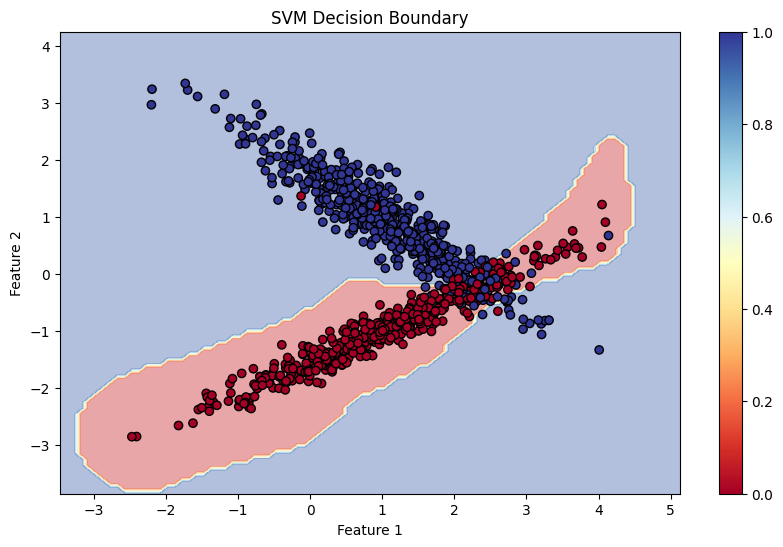

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report

def generate_dataset(n_samples=1000, n_features=2, n_classes=2):
    """
    Generate a custom dataset for classification.

    Parameters:
    -----------
    n_samples : int, optional (default=1000)
        The number of samples to generate.
    n_features : int, optional (default=2)
        The number of features to generate. Keep at 2 for easy visualization.
    n_classes : int, optional (default=2)
        The number of classes (or labels) to generate.

    Returns:
    --------
    X : array of shape (n_samples, n_features)
        The generated samples.
    y : array of shape (n_samples,)
        The integer labels for class membership of each sample.
    """
    X, y = make_classification(
        n_samples=n_samples,
        n_features=n_features,
        n_informative=2,
        n_redundant=0,
        n_classes=n_classes,
        n_clusters_per_class=1,
        random_state=42
    )
    return X, y

def create_svm_pipeline():
    """
    Create a pipeline for SVM with standardization.

    This pipeline ensures that the data is standardized before
    being fed into the SVM model, which is crucial for SVM performance.

    Returns:
    --------
    sklearn.pipeline.Pipeline
        A scikit-learn pipeline with StandardScaler and SVC.
    """
    return Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', SVC())
    ])

def perform_grid_search(pipeline, X_train, y_train):
    """
    Perform grid search to find the best hyperparameters for SVM.

    Parameters:
    -----------
    pipeline : sklearn.pipeline.Pipeline
        The SVM pipeline.
    X_train : array-like of shape (n_samples, n_features)
        The training input samples.
    y_train : array-like of shape (n_samples,)
        The target values for training.

    Returns:
    --------
    sklearn.model_selection.GridSearchCV
        A fitted GridSearchCV object.
    """
    # Define the hyperparameter grid to search
    param_grid = {
        # 'C' is the regularization parameter
        # Smaller values specify stronger regularization
        'classifier__C': [0.1, 1, 10, 100],

        # 'kernel' specifies the kernel type to be used in the algorithm
        # 'linear': linear kernel
        # 'rbf': Radial Basis Function kernel
        # 'poly': Polynomial kernel
        'classifier__kernel': ['linear', 'rbf', 'poly'],

        # 'gamma' is the kernel coefficient for 'rbf' and 'poly'
        # 'scale' uses 1 / (n_features * X.var()) as value of gamma
        # 'auto' uses 1 / n_features
        'classifier__gamma': ['scale', 'auto'],

        # 'degree' is the degree of the polynomial kernel function
        # Only significant for poly kernel
        'classifier__degree': [2, 3, 4]
    }

    # Create a GridSearchCV object
    grid_search = GridSearchCV(
        estimator=pipeline,
        param_grid=param_grid,
        cv=5,  # 5-fold cross-validation
        n_jobs=-1,  # Use all available cores
        verbose=1
    )

    # Fit the grid search to the data
    grid_search.fit(X_train, y_train)

    return grid_search

def evaluate_model(model, X_test, y_test):
    """
    Evaluate the model and print classification metrics.

    Parameters:
    -----------
    model : estimator object
        The fitted model to evaluate.
    X_test : array-like of shape (n_samples, n_features)
        The testing input samples.
    y_test : array-like of shape (n_samples,)
        The target values for testing.
    """
    y_pred = model.predict(X_test)
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("\nClassification Report:\n", classification_report(y_test, y_pred))

def plot_decision_boundary(X, y, model, ax=None):
    """
    Plot the decision boundary for a trained model.

    Parameters:
    -----------
    X : array-like of shape (n_samples, 2)
        The input samples (must be 2D for visualization).
    y : array-like of shape (n_samples,)
        The target values.
    model : fitted estimator object
        The trained model with a predict method.
    ax : matplotlib.axes.Axes, optional
        The axes on which to plot. If None, a new figure and axes will be created.

    Returns:
    --------
    matplotlib.axes.Axes
        The axes containing the plot.
    """
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6))

    # Create a mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    # Make predictions on the mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    ax.contourf(xx, yy, Z, alpha=0.4, cmap='RdYlBu')

    # Plot the original data points
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu', edgecolor='black')

    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_title('SVM Decision Boundary')

    plt.colorbar(scatter, ax=ax)

    return ax

if __name__ == "__main__":
    # Generate custom dataset
    X, y = generate_dataset()

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Create the SVM pipeline
    pipeline = create_svm_pipeline()

    # Perform grid search
    grid_search = perform_grid_search(pipeline, X_train, y_train)

    # Print the best parameters and score
    print("Best parameters:", grid_search.best_params_)
    print("Best cross-validation score:", grid_search.best_score_)

    # Get the best model
    best_model = grid_search.best_estimator_

    # Evaluate the model
    evaluate_model(best_model, X_test, y_test)

    # Plot the decision boundary
    plot_decision_boundary(X, y, best_model)
    plt.show()

# Note: This script will take some time to run due to the extensive grid search.
# The output will show the progress of the grid search, the best parameters found,
# and the performance metrics of the best model on the test set.

### Comparing logistic Regression and SVM


Training Logistic Regression...
Accuracy: 0.9000

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.93      0.91       104
           1       0.92      0.86      0.89        96

    accuracy                           0.90       200
   macro avg       0.90      0.90      0.90       200
weighted avg       0.90      0.90      0.90       200


Training SVM...
Accuracy: 0.9400

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.99      0.94       104
           1       0.99      0.89      0.93        96

    accuracy                           0.94       200
   macro avg       0.95      0.94      0.94       200
weighted avg       0.94      0.94      0.94       200



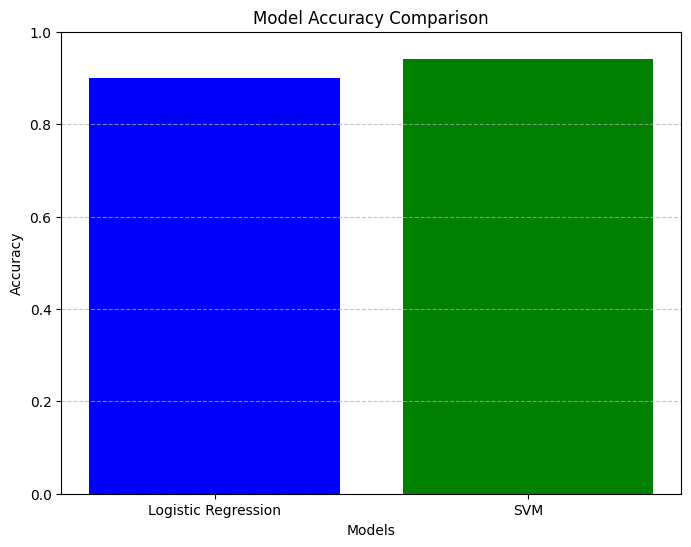


Decision Boundary for Logistic Regression:


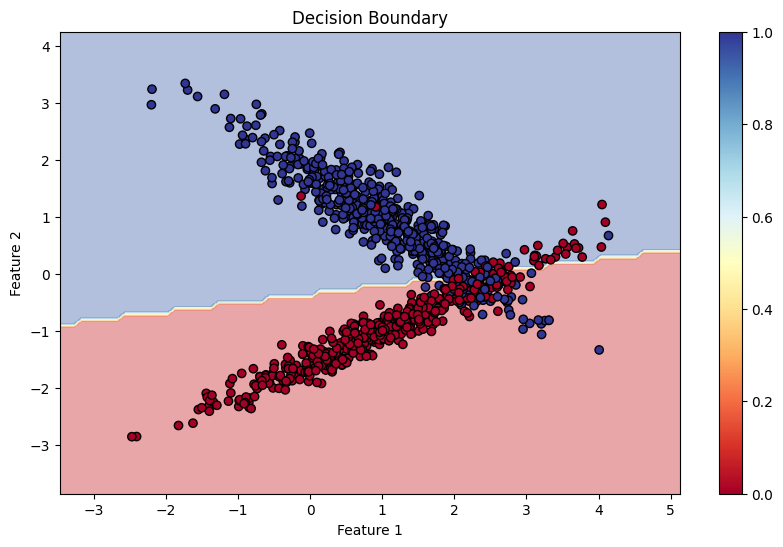


Decision Boundary for SVM:


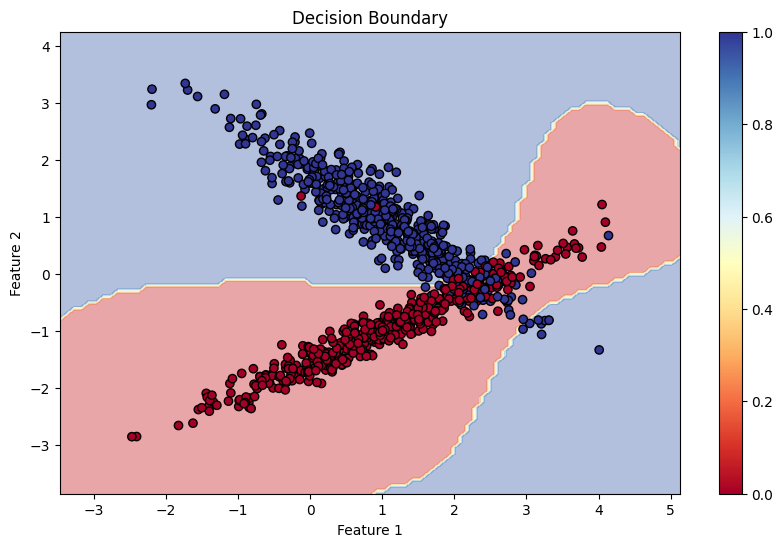

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

def generate_dataset(n_samples=1000, n_features=2, n_classes=2):
    """
    Generate a synthetic classification dataset.

    Parameters:
    -----------
    n_samples : int
        Number of samples to generate.
    n_features : int
        Number of features in the dataset.
    n_classes : int
        Number of classes in the dataset.

    Returns:
    --------
    X : ndarray
        Feature matrix.
    y : ndarray
        Target labels.
    """
    X, y = make_classification(
        n_samples=n_samples,
        n_features=n_features,
        n_informative=2,
        n_redundant=0,
        n_classes=n_classes,
        n_clusters_per_class=1,
        random_state=42
    )
    return X, y

def create_pipeline(classifier):
    """
    Create a pipeline with a scaler and a classifier.

    Parameters:
    -----------
    classifier : sklearn classifier
        The classifier to include in the pipeline.

    Returns:
    --------
    pipeline : sklearn.pipeline.Pipeline
        The created pipeline.
    """
    return Pipeline([
        ('scaler', StandardScaler()),
        ('classifier', classifier)
    ])

def evaluate_model(model, X_test, y_test):
    """
    Evaluate the model on the test set.

    Parameters:
    -----------
    model : sklearn estimator
        Trained model.
    X_test : ndarray
        Test feature matrix.
    y_test : ndarray
        Test target labels.

    Returns:
    --------
    accuracy : float
        Accuracy of the model.
    """
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print("\nClassification Report:\n", classification_report(y_test, y_pred))
    return accuracy

def plot_model_comparison(model_scores):
    """
    Plot comparison of model accuracies.

    Parameters:
    -----------
    model_scores : dict
        Dictionary containing model names and their corresponding accuracies.
    """
    plt.figure(figsize=(8, 6))
    plt.bar(model_scores.keys(), model_scores.values(), color=['blue', 'green'])
    plt.title('Model Accuracy Comparison')
    plt.xlabel('Models')
    plt.ylabel('Accuracy')
    plt.ylim([0, 1])
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

def plot_decision_boundary(X, y, model, ax=None):
    """
    Plot the decision boundary for a trained model.

    Parameters:
    -----------
    X : array-like of shape (n_samples, 2)
        The input samples (must be 2D for visualization).
    y : array-like of shape (n_samples,)
        The target values.
    model : fitted estimator object
        The trained model with a predict method.
    ax : matplotlib.axes.Axes, optional
        The axes on which to plot. If None, a new figure and axes will be created.

    Returns:
    --------
    matplotlib.axes.Axes
        The axes containing the plot.
    """
    if ax is None:
        fig, ax = plt.subplots(figsize=(10, 6))

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.contourf(xx, yy, Z, alpha=0.4, cmap='RdYlBu')
    scatter = ax.scatter(X[:, 0], X[:, 1], c=y, cmap='RdYlBu', edgecolor='black')
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_title('Decision Boundary')
    plt.colorbar(scatter, ax=ax)
    return ax

if __name__ == "__main__":
    # Generate dataset
    X, y = generate_dataset()

    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Define classifiers
    classifiers = {
        'Logistic Regression': LogisticRegression(),
        'SVM': SVC()
    }

    # Dictionary to store results
    model_scores = {}
    best_models = {}

    # Train and evaluate each model
    for name, classifier in classifiers.items():
        print(f"\nTraining {name}...")
        pipeline = create_pipeline(classifier)
        pipeline.fit(X_train, y_train)
        accuracy = evaluate_model(pipeline, X_test, y_test)
        model_scores[name] = accuracy
        best_models[name] = pipeline

    # Plot model comparison
    plot_model_comparison(model_scores)

    # Plot decision boundaries
    for name, model in best_models.items():
        print(f"\nDecision Boundary for {name}:")
        plot_decision_boundary(X, y, model)
        plt.show()
